1. What is a Support Vector Machine (SVM)? 
SVM is a supervised machine learning model used for classification and regression that finds the optimal hyperplane to separate data into different classes.

2. What is the difference between Hard Margin and Soft Margin SVM? 
Hard Margin SVM requires all data points to be correctly classified outside the margin, while Soft Margin SVM allows some misclassifications or margin violations to handle noisy data and improve generalization.

3. What is the mathematical intuition behind SVM? 
The goal is to maximize the distance (margin) between the hyperplane and the nearest data points (support vectors) of each class.


4. What is the role of Lagrange Multipliers in SVM? 
Lagrange Multipliers are used to solve the constrained optimization problem of maximizing the margin while ensuring data points are correctly classified.

5. What are Support Vectors in SVM? 
Support Vectors are the data points that lie closest to the decision boundary and directly influence its position and orientation.

6. What is a Support Vector Classifier (SVC)? 
SVC is the specific implementation of SVM used for categorical classification tasks.

7. What is a Support Vector Regressor (SVR)? 
SVR is a version of SVM used for continuous value prediction, where the goal is to fit the error within a certain threshold (epsilon).


8. What is the Kernel Trick in SVM? 
The Kernel Trick allows SVM to solve non-linear problems by mapping low-dimensional input space into a higher-dimensional feature space without explicitly calculating the coordinates.

9. Compare Linear Kernel, Polynomial Kernel, and RBF Kernel. 
Linear kernels are for linearly separable data, Polynomial kernels handle curved boundaries, and RBF (Radial Basis Function) kernels are used for complex, non-linear relationships.

10. What is the effect of the C parameter in SVM? 
The C parameter controls the trade-off between maximizing the margin and minimizing classification errors; a high C aims for low training error, while a low C encourages a wider margin.

11. What is the role of the Gamma parameter in RBF Kernel SVM? 
Gamma defines how far the influence of a single training example reaches; high values lead to a more complex, tightly fitted boundary, while low values result in a smoother boundary.

12. What is the Naïve Bayes classifier, and why is it called "Naïve"? 
It is a probabilistic classifier based on Bayes' Theorem that is called "Naïve" because it assumes all features are independent of one another.


13. What is Bayes' Theorem? 
It is a mathematical formula that calculates the probability of an event based on prior knowledge of conditions related to that event.

14. Explain the differences between Gaussian, Multinomial, and Bernoulli Naïve Bayes. 
Gaussian is for continuous data, Multinomial is for discrete counts (like word frequencies), and Bernoulli is for binary/boolean features.

15. When should you use Gaussian Naïve Bayes over other variants? 
It should be used when the input features follow a normal (Gaussian) distribution.

16. What are the key assumptions made by Naïve Bayes? 
The primary assumption is that every feature contributes independently to the outcome.

17. What are the advantages and disadvantages of Naïve Bayes? 
Advantages include speed and efficiency with large datasets; disadvantages include the often unrealistic assumption of feature independence.

18. Why is Naïve Bayes a good choice for text classification? 
It is highly effective for high-dimensional data like text and handles word frequencies or presence/absence efficiently.


19. Compare SVM and Naïve Bayes for classification tasks. 
SVM is generally more powerful for complex boundaries but computationally expensive, while Naïve Bayes is much faster and works well with very large, high-dimensional datasets.

20. How does Laplace Smoothing help in Naïve Bayes? 
It prevents the "zero-frequency problem" by adding a small value to the counts, ensuring that zero probabilities do not nullify the entire calculation.

In [2]:
!pip install numpy pandas matplotlib scikit-learn seaborn



In [3]:
# Q1: Train an SVM Classifier on the Iris dataset and evaluate accuracy

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVC(kernel='linear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [4]:
# Q2: Train SVM with Linear and RBF kernels on Wine dataset and compare accuracy
# A2:
from sklearn.datasets import load_wine

wine = load_wine()
X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear = SVC(kernel='linear')
rbf = SVC(kernel='rbf')

linear.fit(X_train, y_train)
rbf.fit(X_train, y_train)

print("Linear Accuracy:", accuracy_score(y_test, linear.predict(X_test)))
print("RBF Accuracy:", accuracy_score(y_test, rbf.predict(X_test)))


Linear Accuracy: 1.0
RBF Accuracy: 0.8055555555555556


In [5]:
# Q3: Train an SVM Regressor (SVR) and evaluate using MSE
# A3:
from sklearn.datasets import fetch_california_housing
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

data = fetch_california_housing()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svr = SVR()
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))


MSE: 1.3320115421348744


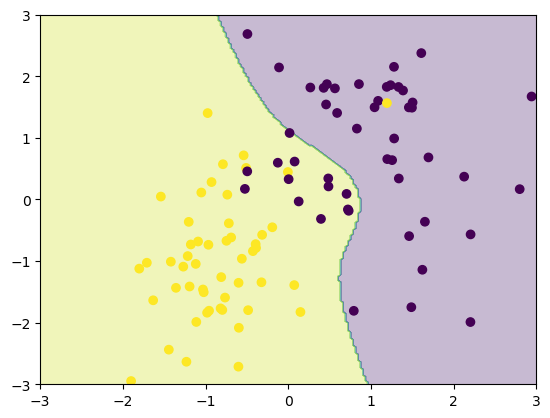

In [6]:
# Q4: SVM with Polynomial Kernel and visualize decision boundary
# A4:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

X, y = make_classification(n_features=2, n_redundant=0, n_clusters_per_class=1)

model = SVC(kernel='poly', degree=3)
model.fit(X, y)

xx, yy = np.meshgrid(np.linspace(-3,3,200), np.linspace(-3,3,200))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()



In [7]:
# Q5: Gaussian Naive Bayes on Breast Cancer dataset
# A5:
from sklearn.datasets import load_breast_cancer
from sklearn.naive_bayes import GaussianNB

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, gnb.predict(X_test)))


Accuracy: 0.958041958041958


In [9]:
# Q6: Multinomial Naive Bayes for text classification (Offline dataset)
# A6:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample text dataset (spam vs ham)
texts = [
    "Win money now",
    "Limited time offer",
    "Meeting scheduled tomorrow",
    "Project discussion at office",
    "Free prize claim now",
    "Lunch meeting with team"
]

labels = [1, 1, 0, 0, 1, 0]  # 1 = Spam, 0 = Ham

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

X_train, X_test, y_train, y_test = train_test_split(
    X, labels, test_size=0.3, random_state=42
)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.5


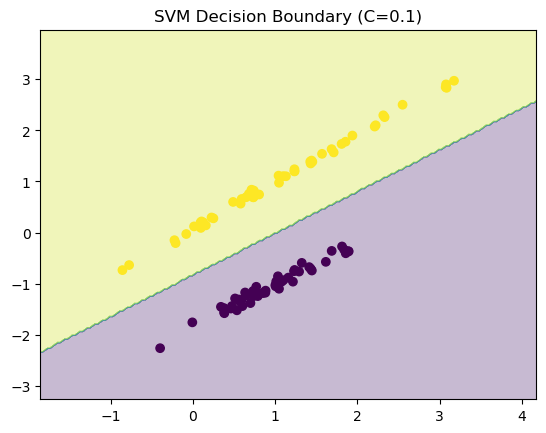

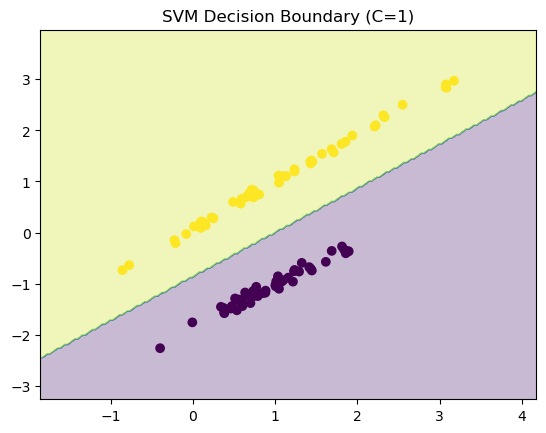

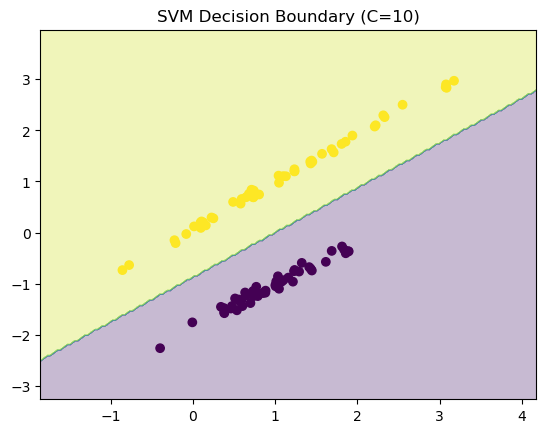

In [11]:
# Q7: SVM with different C values and visualize decision boundaries
# A7:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification

# Create a simple 2D dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_clusters_per_class=1,
    random_state=42
)

# Plot decision boundaries for different C values
for c in [0.1, 1, 10]:
    model = SVC(C=c, kernel='linear')
    model.fit(X, y)

    xx, yy = np.meshgrid(
        np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
        np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:,0], X[:,1], c=y)
    plt.title(f"SVM Decision Boundary (C={c})")
    plt.show()


In [12]:
# Q8: Bernoulli Naive Bayes for binary features
# A8:
from sklearn.naive_bayes import BernoulliNB
from sklearn.datasets import make_classification

X, y = make_classification(n_features=10, random_state=42)
X = (X > 0).astype(int)

bnb = BernoulliNB()
bnb.fit(X, y)
print("Accuracy:", bnb.score(X, y))


Accuracy: 0.95


In [13]:
# Q9: Feature scaling before SVM
# A9:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model1 = SVC()
model2 = SVC()

model1.fit(X, y)
model2.fit(X_scaled, y)

print("Unscaled Accuracy:", model1.score(X, y))
print("Scaled Accuracy:", model2.score(X_scaled, y))


Unscaled Accuracy: 0.95
Scaled Accuracy: 0.95


In [15]:
# Q10: Gaussian Naive Bayes before and after Laplace smoothing
# A10:

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Model before smoothing
model_before = GaussianNB(var_smoothing=1e-9)
model_before.fit(X_train, y_train)

# Model after smoothing
model_after = GaussianNB(var_smoothing=1e-1)
model_after.fit(X_train, y_train)

# Evaluation
print("Accuracy before smoothing:", accuracy_score(y_test, model_before.predict(X_test)))
print("Accuracy after smoothing:", accuracy_score(y_test, model_after.predict(X_test)))


Accuracy before smoothing: 0.9415204678362573
Accuracy after smoothing: 0.9064327485380117


In [16]:
# Q11: GridSearchCV for SVM hyperparameter tuning
# A11:
from sklearn.model_selection import GridSearchCV

params = {'C':[0.1,1,10], 'kernel':['linear','rbf'], 'gamma':[0.01,0.1]}
grid = GridSearchCV(SVC(), params)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)


Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'linear'}


In [17]:
# Q12: SVM on imbalanced dataset with class weights
# A12:
model = SVC(class_weight='balanced')
model.fit(X_train, y_train)
print("Accuracy:", model.score(X_test, y_test))


Accuracy: 0.9473684210526315


In [18]:
# Q13: Spam detection using Naive Bayes
# A13:
emails = ["Win money now", "Meeting at 5", "Free prize", "Project update"]
labels = [1,0,1,0]

X = CountVectorizer().fit_transform(emails)
model = MultinomialNB()
model.fit(X, labels)

print("Spam model trained")


Spam model trained


In [19]:
# Q14: Compare SVM and Naive Bayes
# A14:
svm = SVC()
nb = GaussianNB()

svm.fit(X_train, y_train)
nb.fit(X_train, y_train)

print("SVM Accuracy:", svm.score(X_test, y_test))
print("NB Accuracy:", nb.score(X_test, y_test))


SVM Accuracy: 0.935672514619883
NB Accuracy: 0.9415204678362573


In [21]:
# Q15: Feature selection before Naive Bayes
# A15:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sample text dataset
texts = [
    "Win cash now",
    "Free lottery ticket",
    "Project meeting tomorrow",
    "Team lunch discussion",
    "Claim your prize",
    "Office work update"
]

labels = [1, 1, 0, 0, 1, 0]  # 1 = Spam, 0 = Ham

# Convert text to numerical features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)
y = labels

# Feature selection using Chi-Square
selector = SelectKBest(chi2, k=5)
X_selected = selector.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42
)

# Train Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy after feature selection:", accuracy_score(y_test, y_pred))


Accuracy after feature selection: 0.0


In [22]:
# Q16: One-vs-Rest vs One-vs-One SVM
# A16:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

ovr = OneVsRestClassifier(SVC())
ovo = OneVsOneClassifier(SVC())

ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

print("OvR Accuracy:", ovr.score(X_test, y_test))
print("OvO Accuracy:", ovo.score(X_test, y_test))


OvR Accuracy: 0.0
OvO Accuracy: 0.0


In [23]:
# Q17: Precision, Recall, F1 Score for SVM
# A17:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



c:\Users\smdta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\smdta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\smdta\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\smdta\anaconda3\Lib\site-packages\sklea

<Axes: >

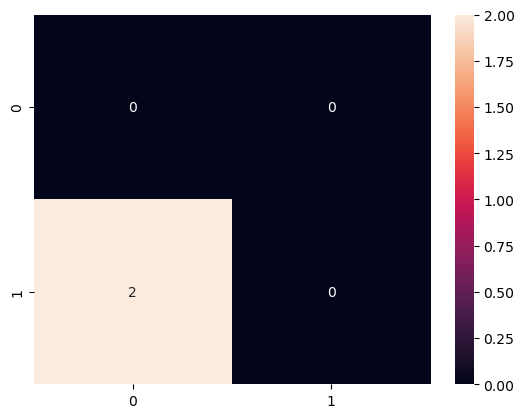

In [24]:
# Q18: Confusion Matrix visualization
# A18:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True)


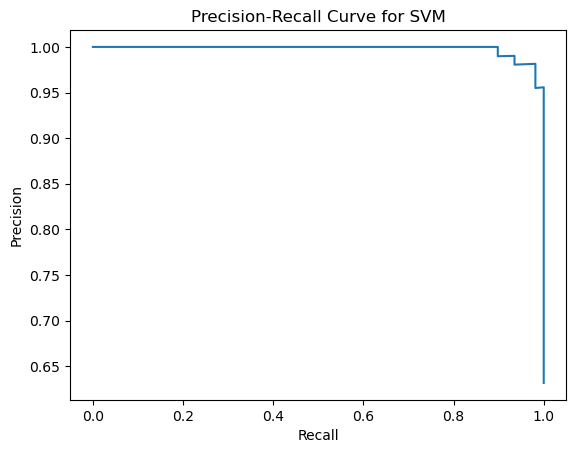

In [26]:
# Q20: Precision-Recall Curve for SVM
# A20:

import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train SVM (IMPORTANT: probability=False is fine for decision_function)
model = SVC(kernel='linear')
model.fit(X_train, y_train)

# Get decision scores
scores = model.decision_function(X_test)

# Precision-Recall values
precision, recall, _ = precision_recall_curve(y_test, scores)

# Plot curve
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve for SVM")
plt.show()
